#khai báo thư viện

In [1]:
#khai bao thư vien
import pandas as pd #đọc dữ lieu
import matplotlib.pyplot as plt #ve biểu đồ
import numpy as np #xử lý dữ lieu
from sklearn.preprocessing import MinMaxScaler #chuấn hoa dữ lieu
from keras.callbacks import ModelCheckpoint #lưu lại huấn luyện tốt nhất
from tensorflow.keras.models import load_model #tai mô hinh

#các lớp để xây dựng mô hình
from keras.models import Sequential #dau vào
from keras.layers import LSTM #học phu thuộc
from keras.layers import Dropout #tránh học tu
from keras.layers import Dense #dầu ra

#kiểm tra độ chính xác của mô hình
from sklearn.metrics import r2_score #đo mức độ phù hợp
from sklearn.metrics import mean_absolute_error #do sai số tuyet đối trung bình
from sklearn.metrics import mean_absolute_percentage_error #do phần trăm sai số tuyệt đối trung bình

#đọc dữ liệu

In [2]:
path="C:\\Users\\21548\\PycharmProjects\\phantichdulieu\\.venv\\khaithac\\data\\TPB.CSV"
df1=pd.read_csv(path)
df1

,Date,Q-P1,S-P2,Q-P2,Volume,Currency,TP,Unnamed: 7
0,20/04/2018,40150,40000,80150,4164231,VND,Ha Long,NaN
1,23/04/2018,42300,41300,83600,1940924,VND,Mong Cai,NaN
2,24/04/2018,41850,41300,83150,2291985,VND,Cam Pha,NaN
3,26/04/2018,41900,41400,83300,1306023,VND,Uong Bi,NaN
4,27/04/2018,41800,40800,82600,1656048,VND,Bac Kan,NaN
...,...,...,...,...,...,...,...,...
1036,9/2/2023,24926,24778,49704,3223124,VND,Dong Xoai,NaN
1037,10/2/2023,25407,25148,50555,2990114,VND,Phu Quoc,NaN
1038,11/2/2023,25704,25185,50889,2584574,VND,Vung Tau,NaN
1039,12/2/2023,39900,39450,79350,37640,VND,Ba Ria - Vung Tau,NaN


#mô tả data

In [3]:
df1.head()

,Date,Q-P1,S-P2,Q-P2,Volume,Currency,TP,Unnamed: 7
0,20/04/2018,40150,40000,80150,4164231,VND,Ha Long,NaN
1,23/04/2018,42300,41300,83600,1940924,VND,Mong Cai,NaN
2,24/04/2018,41850,41300,83150,2291985,VND,Cam Pha,NaN
3,26/04/2018,41900,41400,83300,1306023,VND,Uong Bi,NaN
4,27/04/2018,41800,40800,82600,1656048,VND,Bac Kan,NaN


In [4]:
#kích thước dữ liệu
df1.shape

(1041, 8)

In [5]:
df1["Date"] = pd.to_datetime(df1["Date"], format="%d/%m/%Y")

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1041 non-null   datetime64[ns]
 1   Q-P1        1041 non-null   int64         
 2   S-P2        1041 non-null   int64         
 3   Q-P2        1041 non-null   int64         
 4   Volume      1041 non-null   int64         
 5   Currency    1041 non-null   object        
 6   TP          1041 non-null   object        
 7   Unnamed: 7  0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 65.2+ KB


#tiền xử lý dữ liệu

In [7]:
#lấy dữ liệu
df1=pd.DataFrame(df1,columns=['Date','Q-P2',])
df1.index = df1.Date
df1.drop("Date",axis=1, inplace=True)

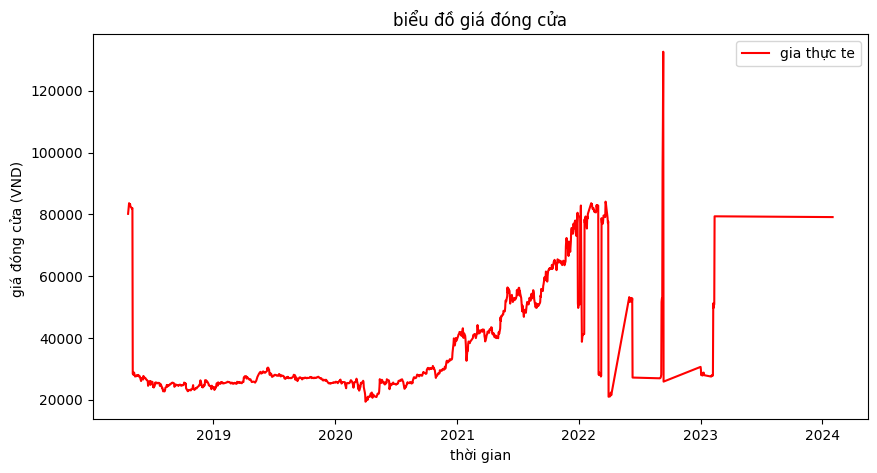

In [8]:
#lập biểu đồ giá đóng cửa
plt.figure(figsize=(10,5))
plt.plot(df1['Q-P2'], label='gia thực te',color='red') #lập biểu đồ
plt.title('biểu đồ giá đóng cửa') #dặt tên bieu đo
plt.xlabel('thời gian') #dặt tên hàn x
plt.ylabel('giá đóng cửa (VND) ')
plt.legend() #chu thích
plt.show()

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1041 entries, 2018-04-20 to 2024-02-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q-P2    1041 non-null   int64
dtypes: int64(1)
memory usage: 16.3 KB


In [10]:
df1

,Q-P2
Date,
2018-04-20,80150
2018-04-23,83600
2018-04-24,83150
2018-04-26,83300
2018-04-27,82600
...,...
2023-02-09,49704
2023-02-10,50555
2023-02-11,50889


In [11]:
data=df1.values
train_data=data[:900]
test_data=data[900:]

In [12]:
data

array([[80150],
       [83600],
       [83150],
       ...,
       [50889],
       [79350],
       [79100]], dtype=int64)

In [13]:
sc=MinMaxScaler(feature_range=(0,1))
sc_train=sc.fit_transform(train_data)

In [14]:
print(sc_train.shape)

(900, 1)


In [15]:
x_train, y_train=[], []
for i in range(50, len(train_data)):
  x_train.append(sc_train[i-50:i,0])
  y_train.append(sc_train[i,0])

In [16]:
x_train

[array([0.94631186, 1.        , 0.9929972 , 0.99533147, 0.98443822,
        0.9719888 , 0.97510115, 0.14052288, 0.13425148, 0.14677871,
        0.13867102, 0.13353564, 0.12689076, 0.1305789 , 0.12836913,
        0.13352007, 0.13277311, 0.13022098, 0.13498288, 0.12726424,
        0.12762216, 0.12947401, 0.12799564, 0.11069094, 0.10407719,
        0.11990352, 0.11584189, 0.11584189, 0.11181139, 0.12983193,
        0.12615935, 0.12396514, 0.12173981, 0.11953003, 0.11364768,
        0.11290072, 0.11106443, 0.11069094, 0.10259882, 0.08014317,
        0.09816371, 0.10112045, 0.10112045, 0.10443511, 0.08490507,
        0.10185185, 0.10149393, 0.09965764, 0.10001556, 0.0889667 ]),
 array([1.        , 0.9929972 , 0.99533147, 0.98443822, 0.9719888 ,
        0.97510115, 0.14052288, 0.13425148, 0.14677871, 0.13867102,
        0.13353564, 0.12689076, 0.1305789 , 0.12836913, 0.13352007,
        0.13277311, 0.13022098, 0.13498288, 0.12726424, 0.12762216,
        0.12947401, 0.12799564, 0.11069094, 0.

In [17]:
print(len(x_train))

850


In [18]:
y_train

[0.07387177093059444,
 0.07609710550887017,
 0.07167755991285402,
 0.08087457205104259,
 0.09596949891067535,
 0.09523809523809523,
 0.09117647058823525,
 0.09707438530967938,
 0.09301276065981945,
 0.09522253345782755,
 0.09301276065981945,
 0.09411764705882353,
 0.09522253345782755,
 0.09411764705882353,
 0.08197945845004667,
 0.07903828197945845,
 0.08748832866479922,
 0.0882197323373794,
 0.07461873638344224,
 0.06797385620915031,
 0.06982570806100213,
 0.05950824774354185,
 0.05250544662309364,
 0.05583566760037345,
 0.0517896047307812,
 0.05325241207594145,
 0.059881730469965755,
 0.07130407718643011,
 0.07424525365701834,
 0.08418923124805477,
 0.07976968565203857,
 0.07609710550887017,
 0.08456271397447868,
 0.08197945845004667,
 0.08197945845004667,
 0.084547152194211,
 0.08490507314036722,
 0.0889666977902272,
 0.09081854964207903,
 0.09081854964207903,
 0.09449112978524743,
 0.09522253345782755,
 0.09634298163709926,
 0.09375972611266725,
 0.09117647058823525,
 0.07497665732

In [19]:
print(len(y_train))

850


In [20]:
#xếp dữ liệu thành 1 mảng`
x_train=np.array(x_train)
y_train=np.array(y_train)

#xếp lại dữ liệu thành mảng 1 chiều
x_train=np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
y_train=np.reshape(y_train, (y_train.shape[0],1))

In [21]:
#xếp dữ liệu thành 1 mảng`
x_train=np.array(x_train)
y_train=np.array(y_train)

In [22]:
print(x_train.shape)

(850, 50, 1)


In [23]:
print(y_train.shape)

(850, 1)


#train

In [24]:
#xây dựng mô hình
model=Sequential()
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=64))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_absolute_error',optimizer='adam')

In [25]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Tạo thư mục lưu model
save_model = "models"

# Xác định đường dẫn đầy đủ đến file model (đã sửa phần mở rộng)
save_model = os.path.join( "models/models.keras")

# Tạo ModelCheckpoint callback
best_model = ModelCheckpoint(
    filepath=save_model,
    monitor='loss',
    verbose=2,
    save_best_only=True,
    mode='auto'
)

# Huấn luyện mô hình
model.fit(x_train, y_train, epochs=5, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/5

Epoch 1: loss improved from inf to 0.07657, saving model to models/models.keras
17/17 - 5s - 282ms/step - loss: 0.0766
Epoch 2/5

Epoch 2: loss improved from 0.07657 to 0.03457, saving model to models/models.keras
17/17 - 1s - 65ms/step - loss: 0.0346
Epoch 3/5

Epoch 3: loss improved from 0.03457 to 0.03067, saving model to models/models.keras
17/17 - 1s - 63ms/step - loss: 0.0307
Epoch 4/5

Epoch 4: loss improved from 0.03067 to 0.02974, saving model to models/models.keras
17/17 - 1s - 62ms/step - loss: 0.0297
Epoch 5/5

Epoch 5: loss did not improve from 0.02974
17/17 - 1s - 58ms/step - loss: 0.0306


In [26]:
#dữ liệu train
y_train=sc.inverse_transform(y_train) #gia thực
final_model=load_model('C:\\Users\\21548\\PycharmProjects\\phantichdulieu\
\\models\\models.keras')
y_train_predict=final_model.predict(x_train)
y_train_predict=sc.inverse_transform(y_train_predict) #gia dự doan

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step


#dự đoán

In [27]:
#xử lý dữ liệu test
test=df1[len(train_data)-50:].values
test=test.reshape(-1,1)
sc_test=sc.transform(test)

x_test=[]
for i in range(50,test.shape[0]):
    x_test.append(sc_test[i-50:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

#dữ liệu test
y_test=data[900:] #giá thực
y_test_predict=final_model.predict(x_test)
y_test_predict=sc.inverse_transform(y_test_predict) #gia dự doán

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\21548\AppData\Local\Temp\ipykernel_3472\106725278.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['Dự đoán'] = y_train_predict  # Thêm dữ liệu
C:\Users\21548\AppData\Local\Temp\ipykernel_3472\106725278.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['Dự đoán'] = y_test_predict  # Thêm dữ liệu


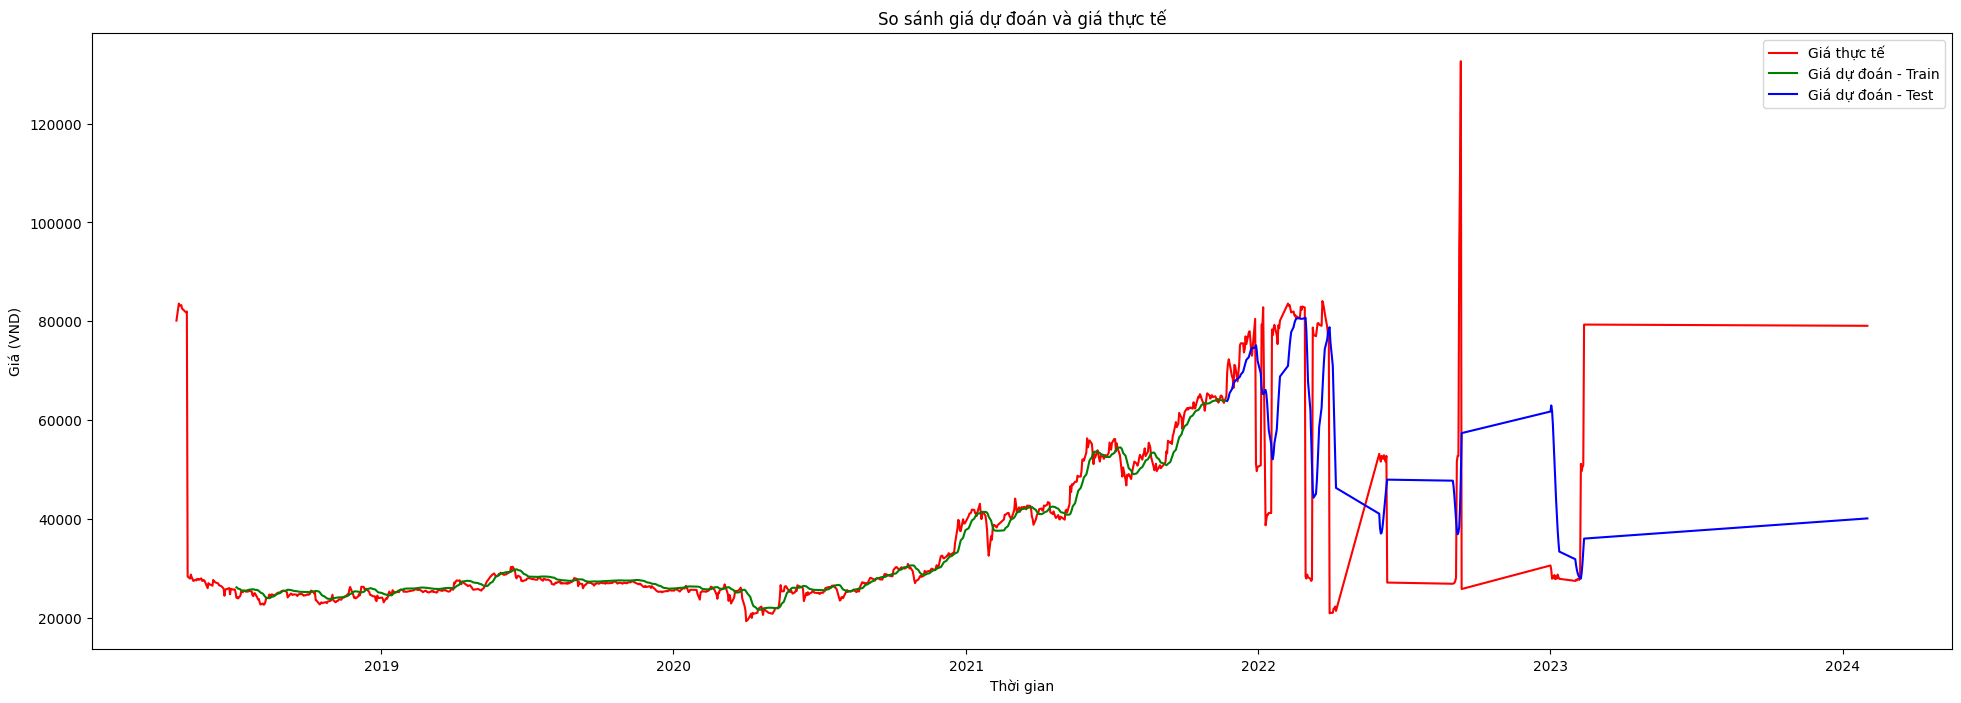

In [28]:
# Lập biểu đồ so sánh
train_data1 = df1[50:900]
test_data1 = df1[900:]

plt.figure(figsize=(24, 8))
plt.plot(df1, label='Giá thực tế', color='red')  # Đường giá thực
train_data1['Dự đoán'] = y_train_predict  # Thêm dữ liệu
plt.plot(train_data1['Dự đoán'], label='Giá dự đoán - Train', color='green')  # Đường giá dự báo train
test_data1['Dự đoán'] = y_test_predict  # Thêm dữ liệu
plt.plot(test_data1['Dự đoán'], label='Giá dự đoán - Test', color='blue')  # Đường giá dự báo test
plt.title('So sánh giá dự đoán và giá thực tế')  # Đặt tên biểu đồ
plt.xlabel('Thời gian')  # Đặt tên trục x
plt.ylabel('Giá (VND)')  # Đặt tên trục y
plt.legend()  # Chú thích
plt.show()


In [29]:
print('Đo phu hop tap train:',r2_score(y_train,y_train_predict))
#mae
print('Sai so tuyet doi trung binh top train:',mean_absolute_error(y_train, y_train_predict))
#mape
print('Phan tram sai so tuyet doi trung binh tap train:',mean_absolute_percentage_error(y_train,y_train_predict))

Đo phu hop tap train: 0.9819947960795187
Sai so tuyet doi trung binh top train: 1076.9954618566176
Phan tram sai so tuyet doi trung binh tap train: 0.032694312018939437
